## 回归模型
![线性回归示意图](./images/监督学习-回归-1.png)
- 回归模型预测数值，线性回归是回归模型的一种

| 特征   | 标签  |
|------|-----|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| ...  | ... |
| 3210 | 870 |

### 机器学习术语
- 训练集（training set): 用来训练模型的数据
- x：特征（feature）/输入变量
- y：输出变量/目标变量
- m：训练集的数量
- (x,y): 单个训练数据
- $x^{(i)}$, $y^{(i)}$： 第i个训练数据

监督学习：

训练集 -- 学习算法 -- 得到一个 f（数学模型， 函数）

x（特征）-- f（模型，函数） -- 预测（预测的y）

问题：这个f怎么表示？

f(x) = wx + b,  这是一个最简单的回归模型：线性回归。 但它可以作为其他回归模型的理解基础
在示例的数据中，它是单变量的线性回归，特征只有一个变量

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x_train 输入变量
# y_train 目标变量
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [4]:
# 使用m 表示训练数据的数量
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
# m = len(x_train)
print(f"训练数据的数量: {m}")

x_train.shape: (2,)
训练数据的数量: 2


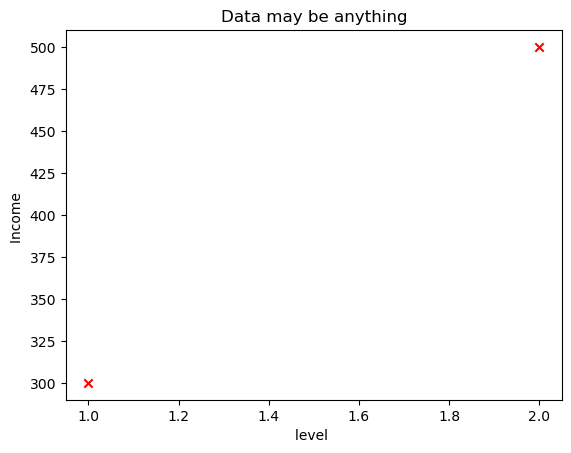

In [6]:
# 画数据的散点图
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Data may be anything")
# Set the y-axis label
plt.ylabel('Income ')
# Set the x-axis label
plt.xlabel('level ')
plt.show()

In [14]:
# 用直线（线性模型）去匹配训练数据，定义线性模型本身的参数 w，b （f(x)=wx+b)
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


In [ ]:
# 可以对每个训练数据的输入变量，计算 f 预测的输出
def compute_model_output(x, w, b):
    """
    计算线性模型的预测
    Args:
      x (ndarray (m,)): Data, m 个训练数据的输入变量
      w,b (scalar)    : 模型参数
    Returns
      f_wb (ndarray (m,)): 模型对输入的预测
    """
    return w*x + b


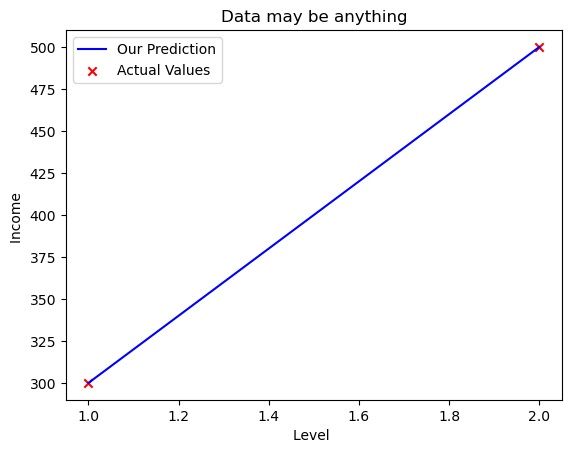

In [15]:
# 调用compute_model_output, 画出输出

tmp_f_wb = compute_model_output(x_train, w, b)
tmp_f_wb
# 画预测的线
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
#
# 画训练数据
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
#
# 设置标题
plt.title("Data may be anything")
#
# 设置y轴标签
plt.ylabel('Income ')
#
# 设置x轴标签
plt.xlabel('Level ')
plt.legend()  # 显示图例
plt.show()

In [ ]:
# 随堂练习：
# 尝试去为线性模型设置不同w和b， w，b是多少的时候可以最好地拟合训练数据


In [16]:
# 预测：现在有了具体的模型（得出了模型的参数，在线性模型里是w和b），可以拿它用来预测没有见过的输入
x_new = 1.2
income_pred = w * x_new + b
print(f"对x=1.2预测的数据: {income_pred:.2f}")

对x=1.2预测的数据: 340.00


### 损失函数
![单个损失](./images/监督学习-回归-2.png)
- 衡量模型的表现，损失函数的值越小说明模型表现越好
- 最小化损失函数的值也被称作训练目标
- f(x) = wx+b, x是固定的，由输入的数据决定，w和b是可以调整的，w，b也被称作模型的权重
- 训练数据的实际的y和f(x)预测的y有差距，因此可以将把每个训练数据的误差都考虑到，定义如下损失函数：均方误差损失（MSE）：
<!-- 预测值定义 -->
$$
\hat y^{(i)} \;=\; w^{\top}x^{(i)} + b
$$

<!-- 损失函数 -->
$$
J(w,b) \;=\; \frac{1}{2m}\sum_{i=1}^{m}\!\bigl(\,\hat y^{(i)} - y^{(i)}\bigr)^2
$$
- 1/2m为了让这个损失值不会因为训练集变大，使误差变得很大；也为了后续计算方便
- 注意：不同的w，b决定了不同的直线模型，不同的直线模型在训练数据上有不同的损失 -> J(w,b)是关于w，b的函数！w，b是自变量。
- 找到w，b使得J(w,b)最小化，这样的w，b也能最贴合训练数据，只要J(w,b)的定义合理

总结： 模型训练的四要素
- 模型的假设： 对模型数学公式的假设，直线模型
- 参数：数学公式自己的参数，wx+b， 参数 w和b
- 损失函数: 关于参数的函数，输入：模型的参数 返回的数字
- 目标： 找到w和b，可以最小化损失函数

![损失函数图像](./images/监督学习-回归-3.png)

### 达到目标/最小化损失函数的方式 -- 梯度下降
- 一个函数关于每个变量的偏导数，每个变量的偏导数组织在一起是一个向量，这个向量的方向是函数增长最快的方向
- 每个具体w，b计算梯度,得到具体的向量，当前w，b沿着梯度相反的方向走，可以是J(w,b)变小
- 梯度下降算法在机器学习中很常用，不只是线性回归
- 步骤：
-   1. 初始化w和b  2. 不断改变w，b使得J(w,b)变小  3. 直到在最小值附近
- 损失函数不一定只有一个最小值，可能有多个最小值, 所以不同的初始w，b可能会走向不同的最小值；但平方差之和的损失函数肯定只有一个最小值：

![多个最小值的损失函数](./images/监督学习-回归4.png)

### 梯度下降：同步更新 vs. 不同步更新

| 步骤           | **同步更新（Simultaneous / Synchronous）**<br>——最常用，保证同一轮梯度基于“旧参数” | **不同步更新（Sequential / Asynchronous）**<br>——概念说明用，实际较少单独使用                                                             |
|--------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **1 计算梯度**   | \\(g_w = \frac{\partial J}{\partial w}(w,b),\; g_b = \frac{\partial J}{\partial b}(w,b)\\) | **先算 \\(w\\) 梯度**<br>\\(g_w = \frac{\partial J}{\partial w}(w,b)\\)                                                  |
| **2 生成暂存变量** | \\(\tilde w = w - \alpha g_w\\)<br>\\(\tilde b = b - \alpha g_b\\) | （无暂存，直接改）<br>\\(w \leftarrow w - \alpha g_w\\)                                                                       |
| **3 赋值**     | \\(w \leftarrow \tilde w\\)<br>\\(b \leftarrow \tilde b\\)<br>**同时生效** | **再用已更新的 \\(w\\)** 重新计算<br>\\(g_b = \frac{\partial J}{\partial b}(w,b)\\)<br>然后<br>\\(b \leftarrow b - \alpha g_b\\) |
| **4 迭代下一轮**  | 全部参数都基于**上一轮旧值**算梯度，收敛更平稳 | 后计算的参数用到了**前面已更新的新值**；和同步更新的性质不一样                                                                                    |

---

- 同步更新公式（常用写法）：
\begin{aligned}
g_w &= \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})\,x^{(i)},\\[4pt]
g_b &= \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)}),\\[8pt]
w &\leftarrow w - \alpha\,g_w,\\
b &\leftarrow b - \alpha\,g_b.
\end{aligned}

- 不同步更新示例：
\begin{aligned}
w &\leftarrow w - \alpha\,\frac{\partial J}{\partial w}(w,b)\\[6pt]
b &\leftarrow b - \alpha\,\frac{\partial J}{\partial b}\bigl(\underbrace{w}_{\text{已更新}},\,b\bigr).
\end{aligned}

- 梯度下降直觉：
1. 可以把参数b去掉，J(w)是一个变量的函数，J(w)在某个w0的导数是正数，说明w0应该往左，J(w)会变低；导数是负数，说明w0应该往右，J(w)会变低，所以即使单个变量的函数，把导数的正负看成方向，导数的方向也是函数增长的最快方向。
2. 所以参数的更新公式是 w = w - learning_rate(学习率) * (dJ/dw), dJ/dw是损失函数的导数； 才可能保证J(w)变低

### 学习率α
- 如果学习率太小，梯度下降可以正常进行，但会很慢

![学习率小](./images/监督学习-回归5.png)

- 如果学习率太大：
    1. 更新可能会一直跨过达到最小值的参数，一直到不了最小值
    2. 损失函数值可能不会收敛到一个值，会发散。

![学习率大](./images/监督学习-回归6.png)

- 如果初始化的参数正好落在了局部最小值，梯度下降不会更新参数
- 如果学习率正合适，每次用梯度下降更新参数，不需要改变学习率，固定学习率也可以使得J(w,b)到达局部最小值
    1. 在局部最小值附近，导数变小了，每次更新的幅度自动变小了
    2. 所以不需要降低学习率去到达局部最小

![学习率合适](./images/监督学习-回归7.png)

### 线性回归模型的梯度下降
- 线性回归模型：
$$
f(x) \;=\; w*x + b
$$
- 损失函数：
$$
J(w,b) \;=\; \frac{1}{2m}\sum_{i=1}^{m}\!\bigl(\,f(x^{(i)}) - y^{(i)}\bigr)^2
$$
- 优化（最小化）损失函数的方式：
\begin{aligned}
g_w &= \frac{1}{m}\sum_{i=1}^{m}(f(x^{(i)})-y^{(i)})\,x^{(i)},\\[4pt]
g_b &= \frac{1}{m}\sum_{i=1}^{m}(f(x^{(i)})-y^{(i)}),\\[8pt]
w &\leftarrow w - \alpha\,g_w,\\
b &\leftarrow b - \alpha\,g_b.
\end{aligned}

- 导数公式的推导过程（不理解也没关系，有最终的梯度公式就能写代码了）：
\begin{aligned}
\frac{\partial J}{\partial w}
   &=\frac{\partial}{\partial w}\;
     \frac1{2m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)^2 \\[4pt]
   &=\frac1{2m}\sum_{i=1}^{m}2\bigl(wx^{(i)}+b-y^{(i)}\bigr)\,x^{(i)} \\[4pt]
   &=\frac1{m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)\,x^{(i)}
\end{aligned}

\begin{aligned}
\frac{\partial J}{\partial b}
   &=\frac{\partial}{\partial b}\;
     \frac1{2m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)^2 \\[4pt]
   &=\frac1{2m}\sum_{i=1}^{m}2\bigl(wx^{(i)}+b-y^{(i)}\bigr) \\[4pt]
   &=\frac1{m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)
\end{aligned}

- 梯度下降最终算法：
重复执行以下逻辑，直到J的值收敛了，或者直到w和b的梯度接近于0；注意：**同时更新 \(w\) 和 \(b\)**
\begin{aligned}
w &\;\leftarrow\; w - \alpha \,\frac{1}{m}\sum_{i=1}^{m}
      \Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)\,x^{(i)},\\[6pt]
b &\;\leftarrow\; b - \alpha \,\frac{1}{m}\sum_{i=1}^{m}
      \Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr).
\end{aligned}

- 线性回归的平方差之和的损失函数是凹函数（碗状函数），只有一个全局最小值，没有局部最小值
- 这个算法梯度下降的每一步用了所有的训练数据，每一步用了所有训练数据的梯度下降也叫 批量梯度下降（Batch Gradient Descent)； 有一步梯度下降用训练数据的子集参与计算的算法


b### 线性回归梯度下降代码实验

In [1]:
import numpy as np
import matplotlib.pyplot as plt

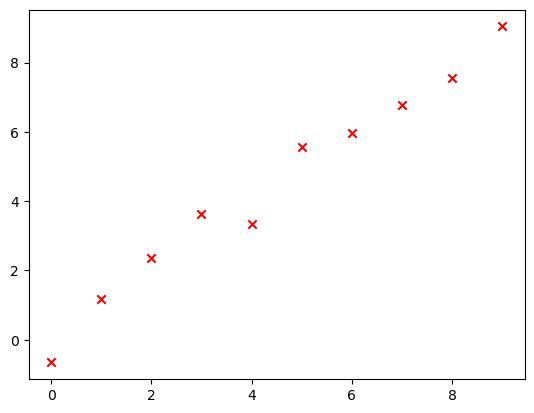

In [6]:
# TODO 1. 自定义训练集数据, 并用散点图可视化
x_train = ...  # 输入数据
y_train = ...  # 输入数据对应的标签

# 示例图片：

In [27]:
# 2. 完成损失函数的实现
def compute_cost(x, y, w, b):
    """
    x: ndarray (m,) 训练数据的特征
    y: ndarray (m,) 训练数据的标签
    w: 浮点数，直线模型的参数
    b: 浮点数，直线模型的参数
    return: 浮点数，当前w，b下的损失值
    """
    # TODO

In [28]:
# 3. 完成计算梯度函数的实现
def compute_gradient(x, y, w, b):
    """
    计算线性回归的梯度
    参数:
      x (ndarray (m,)): 输入数据，m 个样本
      y (ndarray (m,)): 目标值
      w, b (浮点数)   : 模型参数
    返回:
      dj_dw (浮点数): 损失函数对参数 w 的梯度
      dj_db (浮点数): 损失函数对参数 b 的梯度
    """
    # TODO

- 检查梯度计算实现是否正确，本质是根据导数的定义来计算：
| 概念                          | 说明                                                                                                                                                                             |
| --------------------------- |--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **梯度检查（Gradient Checking）** | 在机器学习中会遇到复杂的梯度公式。为了防止推导或代码实现出错，可用 **数值差分**（finite difference）近似梯度，再与解析梯度对比。若两者误差极小，就说明实现是可信的。                                                                                  |
| **中心差分**                    | 数值梯度近似公式：<br>\\(\displaystyle \frac{\partial J}{\partial \theta}\approx\frac{J(\theta+\varepsilon)-J(\theta-\varepsilon)}{2\varepsilon}\\)；误差 \\(O(\varepsilon^2)\\)，比单边差分更精确。 |
| **适用场景**                    | - 调试早期代码<br>- 单元测试（确保未来改动不破坏梯度）<br>                                                                                                                        |
| **限制**                      | 数值差分需要多次计算损失函数，**速度慢**。真实深度神经网络只在开发阶段做小批量检查。                                                                                                                  |


- 中心差分更准确的数学扩展（了解即可）：

为什么中心差分更精确？

\begin{aligned}
J(\theta + \varepsilon)
&= J(\theta) + \varepsilon J'(\theta) + \frac{\varepsilon^{2}}{2}J''(\theta) + \mathcal{O}\!\bigl(\varepsilon^{3}\bigr),\\[6pt]
J(\theta - \varepsilon)
&= J(\theta) - \varepsilon J'(\theta) + \frac{\varepsilon^{2}}{2}J''(\theta) + \mathcal{O}\!\bigl(\varepsilon^{3}\bigr).
\end{aligned}

上述公式相减，误差只剩下极小数epsilon的立方项



In [29]:
def gradient_check(x, y, w, b, eps=1e-7, tol=1e-4, verbose=True):
    """
    使用数值差分验证 compute_gradient 是否正确
    Args:
        x, y : 数据集
        w, b : 当前参数（float）
        eps  : 微小扰动 ε，用于近似数值梯度
        tol  : 容差阈值，|解析梯度 - 数值梯度| < tol 视为通过
        verbose: 打印详细差异
    Returns:
        passed (bool) : 是否通过梯度检查
    """
    # 1) 解析梯度
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # 2) 数值梯度——中心差分
    num_dj_dw = (compute_cost(x, y, w + eps, b) -
                 compute_cost(x, y, w - eps, b)) / (2 * eps)
    num_dj_db = (compute_cost(x, y, w, b + eps) -
                 compute_cost(x, y, w, b - eps)) / (2 * eps)

    # 3) 误差
    diff_w = abs(dj_dw - num_dj_dw)
    diff_b = abs(dj_db - num_dj_db)
    passed = diff_w < tol and diff_b < tol

    if verbose:
        print(f"你实现的 dj_dw = {dj_dw: .6e}, 数值模拟 = {num_dj_dw: .6e}, 误差 = {diff_w: .2e}")
        print(f"你实现的 dj_db = {dj_db: .6e}, 数值模拟 = {num_dj_db: .6e}, 误差 = {diff_b: .2e}")
        print("OK! Gradient check PASSED" if passed else "Gradient check FAILED")

    return passed

test_w = 2
test_b = 1
assert gradient_check(x_train,y_train,test_w,test_b), "梯度检查失败 梯度的实现有问题！！！"

你实现的 dj_dw =  3.319238e+01, 数值模拟 =  3.319238e+01, 误差 =  1.74e-08
你实现的 dj_db =  5.525835e+00, 数值模拟 =  5.525835e+00, 误差 =  8.63e-09
OK! Gradient check PASSED


- 实现梯度下降算法

既然梯度可以计算了，梯度下降法就可以实现了。要实现什么（Todo） 以及其他代码在做什么在注释中描述。 实现完成后，你将利用此函数在训练数据上找到 w和 b的最优值。


In [30]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters,
                     cost_function, gradient_function):
    """
    执行梯度下降以拟合线性模型参数 w、b
    将进行 num_iters 次参数更新，学习率为 alpha。

    参数:
      x (ndarray (m,))  : 输入数据，共 m 个样本
      y (ndarray (m,))  : 目标值
      w_in, b_in (float): 参数初始值
      alpha (float)     : 学习率
      num_iters (int)   : 梯度下降迭代次数
      cost_function     : 计算成本 J 的函数
      gradient_function : 计算梯度 (dj_dw, dj_db) 的函数

    返回:
      w (float)        : 迭代结束后的 w
      b (float)        : 迭代结束后的 b
      J_history (list) : 每次迭代的损失值
      p_history (list) : 每次迭代的参数 [w, b]
    """

    # 用于保存损失值和参数历史，便于后续绘图
    J_history = []
    p_history = []

    w, b = w_in, b_in
    dj_dw, dj_db = 0, 0

    for i in range(num_iters):
        # Todo：1. 利用形式参数 gradient_function 计算梯度

        # Todo：2.  按梯度下降公式同步更新参数 w，b

        # 保存成本与参数
        if i < 100_000:            # 防止存储资源消耗过大
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # 每进行总迭代次数的 1/10（或不足 10 次时每次）打印一次训练的信息
        if i % math.ceil(num_iters / 10) == 0:
            print(f"迭代 {i:4d}:  成本 {J_history[-1]:0.2e}  "
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  "
                  f"w: {w: 0.3e}, b: {b: 0.5e}")

    # 返回最终参数及历史记录
    return w, b, J_history, p_history

In [31]:
# 初始化直线的参数
w_init = 0
b_init = 0

# 梯度下降算法 设置迭代次数 和 学习率
iterations = 10000
tmp_alpha = 1.0e-2

# 运行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"梯度下降找到的(w,b) : ({w_final:8.4f},{b_final:8.4f})")

迭代    0:  成本 7.14e+00  dj_dw: -2.831e+01, dj_db: -4.474e+00  w:  2.831e-01, b:  4.47416e-02
迭代 1000:  成本 9.72e-02  dj_dw: -3.697e-04, dj_db:  2.318e-03  w:  9.895e-01, b:  2.38730e-02
迭代 2000:  成本 9.72e-02  dj_dw: -2.187e-05, dj_db:  1.371e-04  w:  9.907e-01, b:  1.61708e-02
迭代 3000:  成本 9.72e-02  dj_dw: -1.294e-06, dj_db:  8.111e-06  w:  9.908e-01, b:  1.57152e-02
迭代 4000:  成本 9.72e-02  dj_dw: -7.652e-08, dj_db:  4.798e-07  w:  9.908e-01, b:  1.56882e-02
迭代 5000:  成本 9.72e-02  dj_dw: -4.526e-09, dj_db:  2.838e-08  w:  9.908e-01, b:  1.56866e-02
迭代 6000:  成本 9.72e-02  dj_dw: -2.677e-10, dj_db:  1.679e-09  w:  9.908e-01, b:  1.56865e-02
迭代 7000:  成本 9.72e-02  dj_dw: -1.584e-11, dj_db:  9.931e-11  w:  9.908e-01, b:  1.56865e-02
迭代 8000:  成本 9.72e-02  dj_dw: -9.354e-13, dj_db:  5.875e-12  w:  9.908e-01, b:  1.56865e-02
迭代 9000:  成本 9.72e-02  dj_dw: -5.809e-14, dj_db:  3.472e-13  w:  9.908e-01, b:  1.56865e-02
梯度下降找到的(w,b) : (  0.9908,  0.0157)


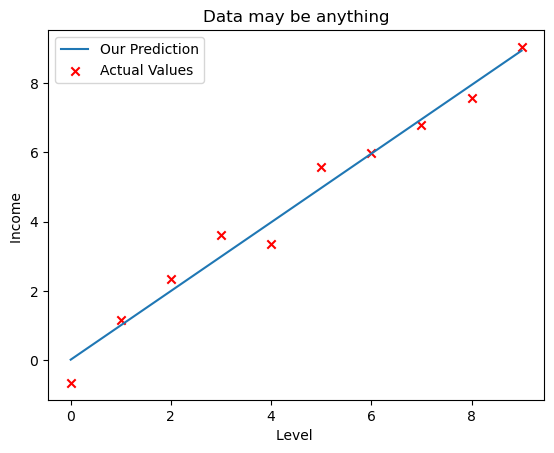

In [33]:
# TODO： 画 对训练数据拟合的直线 和 训练数据的散点图，画到一张图里

# 示例图片：

- 损失值和梯度下降迭代次数的关系

损失值与迭代次数的关系图是衡量梯度下降进展的有效指标。在成功的运行中，成本应该始终下降。由于初始成本的变化非常迅速，因此将初始下降过程与最终下降过程以不同的比例绘制是很有用的。在下图中，请注意坐标轴上的损失比例和迭代步长。

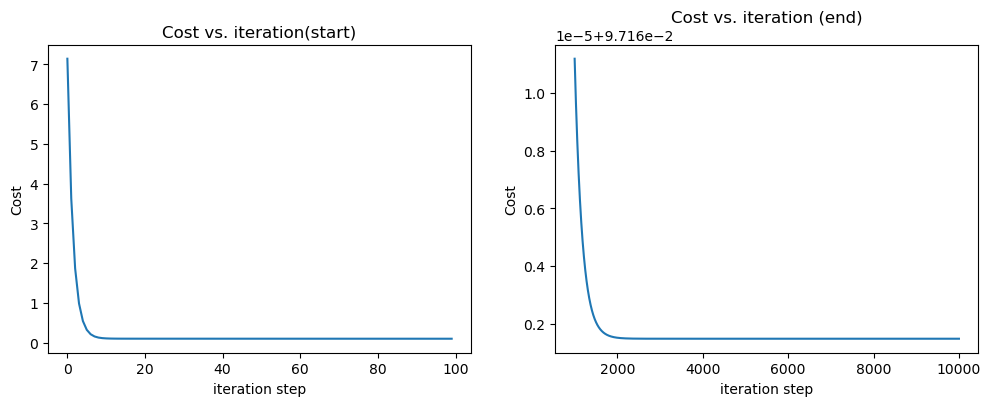

In [35]:
# 画损失值 和 迭代次数的关系
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

- 预测

现在您已经找到了参数 w 和 b的最优值，现在可以使用模型根据我们学习到的参数来预测没有见过的数据。

In [37]:
# TODO： 自己任意定义不在训练集里的x，用学习到的参数w和b预测x对应的y

- 增加学习率alpha

我们讨论了梯度下降中学习率 alpha 的合理取值。𝛼 越大，梯度下降收敛速度越快。但是，如果 𝛼 过大，梯度下降就会发散。上面有一个收敛效果良好的解的例子。
我们试着增加 𝛼 的值，看看会发生什么：

In [38]:
# 初始化参数
w_init = 0
b_init = 0

# 设置学习率
iterations = 10
tmp_alpha = ... # TODO： 设置一个相对较大的alpha （0.8-2之间）

# 运行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

迭代    0:  成本 7.04e+03  dj_dw: -2.831e+01, dj_db: -4.474e+00  w:  2.265e+01, b:  3.57933e+00
迭代    1:  成本 3.52e+06  dj_dw:  6.332e+02, dj_db:  1.010e+02  w: -4.839e+02, b: -7.72307e+01
迭代    2:  成本 1.76e+09  dj_dw: -1.417e+04, dj_db: -2.259e+03  w:  1.085e+04, b:  1.73026e+03
迭代    3:  成本 8.83e+11  dj_dw:  3.170e+05, dj_db:  5.055e+04  w: -2.427e+05, b: -3.87112e+04
迭代    4:  成本 4.42e+14  dj_dw: -7.092e+06, dj_db: -1.131e+06  w:  5.431e+06, b:  8.66130e+05
迭代    5:  成本 2.21e+17  dj_dw:  1.587e+08, dj_db:  2.531e+07  w: -1.215e+08, b: -1.93789e+07
迭代    6:  成本 1.11e+20  dj_dw: -3.550e+09, dj_db: -5.662e+08  w:  2.719e+09, b:  4.33585e+08
迭代    7:  成本 5.54e+22  dj_dw:  7.944e+10, dj_db:  1.267e+10  w: -6.083e+10, b: -9.70108e+09
迭代    8:  成本 2.78e+25  dj_dw: -1.777e+12, dj_db: -2.834e+11  w:  1.361e+12, b:  2.17053e+11
迭代    9:  成本 1.39e+28  dj_dw:  3.977e+13, dj_db:  6.342e+12  w: -3.045e+13, b: -4.85637e+12
